<a href="https://colab.research.google.com/github/MattJun/INST326-Final-Project/blob/main/LogisticRegressionAirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

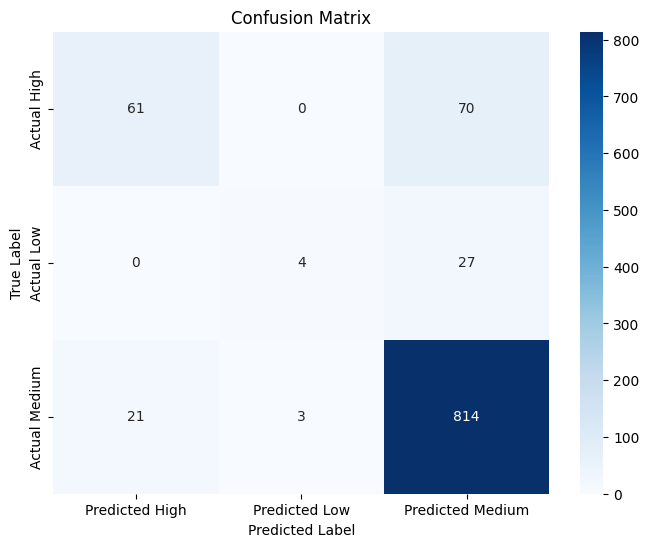

Classification Report:
              precision    recall  f1-score   support
high           0.743902  0.465649  0.572770   131.000
low            0.571429  0.129032  0.210526    31.000
medium         0.893524  0.971360  0.930818   838.000
accuracy       0.879000  0.879000  0.879000     0.879
macro avg      0.736285  0.522014  0.571371  1000.000
weighted avg   0.863938  0.879000  0.861584  1000.000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Airbnb_Data.csv") #Dataset

features = ['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type',   #Features
            'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified',
            'instant_bookable', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
target = 'price_category'  # New column to be created

df['price_category'] = pd.cut(df['log_price'], bins=3, labels=['low', 'medium', 'high']) #Converted log_price into the price categories

label_encoders = {} #Categorical variables
for feature in features:
    if df[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature])

imputer = SimpleImputer(strategy='median') #Missing values
X = imputer.fit_transform(df[features])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split the dataset into training and testing sets

classifier = RandomForestClassifier(n_estimators=100, random_state=42) #Random Forest classifier
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) #Predict on the testing set

report = classification_report(y_test, y_pred, output_dict=True) #Classification report
df_report = pd.DataFrame(report).transpose()

conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual High', 'Actual Low', 'Actual Medium'], #Confusion matrix
                              columns=['Predicted High', 'Predicted Low', 'Predicted Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, cmap="Blues", fmt="d") #Plotted confusion matrix
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(df_report)


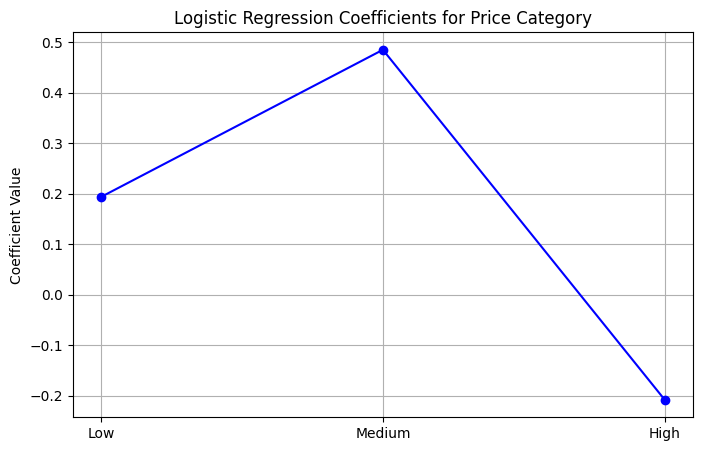

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv("Airbnb_Data.csv") #Dataset

features = ['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type',    #Features
            'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified',
            'instant_bookable', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
target = 'price_category'  #New column created

df['price_category'] = pd.cut(df['log_price'], bins=3, labels=['low', 'medium', 'high']) #Converted log_price into the price categories

label_encoders = {} #Categorical Variables
for feature in features:
    if df[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature])

imputer = SimpleImputer(strategy='median') #Missing values
X = imputer.fit_transform(df[features])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Split the dataset

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_reg = LogisticRegression(max_iter=1000) #Logistic Regression
logistic_reg.fit(X_train, y_train)

price_category_coef = logistic_reg.coef_[0][-3:]  #Only the last three coefficients

plt.figure(figsize=(8, 5)) #Plotting the logistic regression coefficients for the price category
plt.plot(['Low', 'Medium', 'High'], price_category_coef, marker='o', color='blue', linestyle='-')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients for Price Category')
plt.grid(True)
plt.show()


Saving Airbnb_Data.csv to Airbnb_Data (7).csv


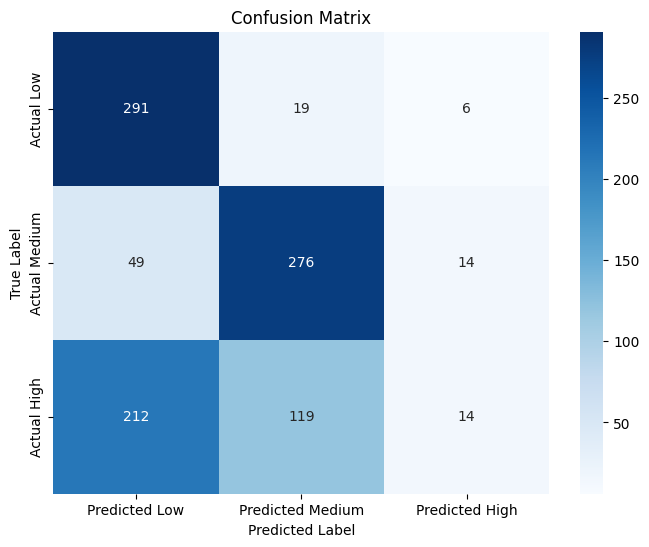

Classification Report:
              precision    recall  f1-score   support
High           0.527174  0.920886  0.670507   316.000
Low            0.666667  0.814159  0.733068   339.000
Medium         0.411765  0.040580  0.073879   345.000
accuracy       0.581000  0.581000  0.581000     0.581
macro avg      0.535202  0.591875  0.492484  1000.000
weighted avg   0.534646  0.581000  0.485878  1000.000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

features = ['property_type', 'room_type']  # Adjust features as needed
target = 'log_price'

df[target] = pd.qcut(df[target], q=3, labels=['Low', 'Medium', 'High']) #Convert log_price into categorical labels

label_encoders = {}
for feature in features:
    if df[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature])

imputer = SimpleImputer(strategy='median') #Handling missing values
X = imputer.fit_transform(df[features])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Splitting the dataset into training and testing sets

classifier = RandomForestClassifier(n_estimators=100, random_state=42) #Random Forest classifier
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


report = classification_report(y_test, y_pred, output_dict=True) #report
df_report = pd.DataFrame(report).transpose()

conf_matrix = confusion_matrix(y_test, y_pred) #confusion matrix
df_conf_matrix = pd.DataFrame(conf_matrix, index=['Actual Low', 'Actual Medium', 'Actual High'],
                              columns=['Predicted Low', 'Predicted Medium', 'Predicted High'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, cmap="Blues", fmt="d") # confusion matrix
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(df_report)

